## 003: 無限の目を持つサイコロ

今回はsympyで問題を作ると言うより、すでに作った問題を問題を解く、と言う形にしたいと思います。

問題文:
- - -

ここに、ボタンを押すと、$\frac{1}{2}$の確率で$1$が、$\frac{1}{4}$の確率で$2$が、$\frac{1}{8}$の確率で$3$が、$\frac{1}{16}$の確率で$4$が、と言ったように、nを自然数として、$\frac{1}{2^n}$の確率で$n$がスクリーン上に表示される機械がある。

この機械のボタンを$2$回押し、表示された数を順に$a, b$とする時、次の問いに答えよ。

(1) $a + b = 5$となる確率を求めよ。

(2) $ab = 18$となる確率を求めよ。

(3) $a = b$となる確率を求めよ。

(4) $a = 2b$となる確率を求めよ。

(5) $\frac{a}{b}$が整数となる確率を求めよ。

- - -

### (1)

まずは、(1)を解くために、$a + b = 5$となる自然数$a, b$の組を全て求めてみましょう。

これは、$(a, b) = (1, 4), (2, 3), (3, 2), (4, 1)$です。

（sympyで解かせようとしたけど、dekinakattayo....）

あとはa, bの値に応じて、それぞれの場合の確率を求め、足し合わせれば良い。

In [96]:
from sympy import *
init_printing()

sol1 = [(1,4),(2,3),(3,2),(4,1)]

ans1 = 0

for i in sol1:
    ans1 += Rational(1, 2**i[0]) * Rational(1, 2**i[1])

ans1

## (2)

これも同様に。しかしこの場合はディオファントス方程式のソルバーが使えるので、sympyに全部やらせよう。

まずは、先程と同様に、$ab = 18$となる自然数$a, b$の組を全て求める。

In [97]:
from sympy.solvers.diophantine import diophantine
a, b = symbols("a b")

sol2 = diophantine(a*b - 18)

sol2

あとは、a, bの組み合わせに応じて確率を求める。負の数やゼロはスクリーン上に表示されることはないので数えない。

In [106]:
ans2 = 0
for i in sol2:
    if i[0] > 0 and i[1] > 0:
        ans2 += Rational(1, 2**i[0]) * Rational(1, 2**i[1])

ans2

結構えげつない数になったね！

## (3)

$a = b$と言うことは、aとbの数の組み合わせを考えると、
$$(a, b) = (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), \cdots$$
と言う感じになる。それぞれの確率を求めると、

$(1, 1)$の時→$\frac{1}{2} \times \frac{1}{2} = \frac{1}{4}$

$(2, 2)$の時→$\frac{1}{4} \times \frac{1}{4} = \frac{1}{16}$

$(3, 3)$の時→$\frac{1}{8} \times \frac{1}{8} = \frac{1}{64}$

$(4, 4)$の時→$\frac{1}{16} \times \frac{1}{16} = \frac{1}{256}$

$(5, 5)$の時→$\frac{1}{32} \times \frac{1}{32} = \frac{1}{1024}$

$(6, 6)$の時→$\frac{1}{64} \times \frac{1}{64} = \frac{1}{4096}$

(以降、無限に続く・・・)

と言った風になる。つまり、答えは、
$$\frac{1}{2^2} + \frac{1}{2^4} + \frac{1}{2^6} + \frac{1}{2^8} + \frac{1}{2^{10}} + \frac{1}{2^{12}} + \cdots = \sum_{n=1}^{\infty} 2^{-2n}$$
となるわけです。ではこれを求めて見ましょう。

In [124]:
n = Symbol("n")
ans3 = Sum(2**(-2*n), (n, 1, oo)).doit()
ans3

## (4)

$a = 2b$の場合も同様にして、$$(a, b) = (2, 1), (4, 2), (6, 3), (8, 4), (10, 5), (12, 6), \cdots$$となるので、
$$
\begin{eqnarray}
&&\frac{1}{2^2} \cdot \frac{1}{2^1} &+ &
\frac{1}{2^4} \cdot \frac{1}{2^2} &+&
\frac{1}{2^6} \cdot \frac{1}{2^3} &+&
\frac{1}{2^8} \cdot \frac{1}{2^4} &+&
\frac{1}{2^{10}} \cdot \frac{1}{2^5} &+&
\frac{1}{2^{12}} \cdot \frac{1}{2^6} &+& \cdots \\
&=&\frac{1}{2^3} &+& \frac{1}{2^6} &+& \frac{1}{2^9} &+& \frac{1}{2^{12}} &+& \frac{1}{2^{15}} &+& \frac{1}{2^{18}} &+& \cdots \\
&=&\sum_{n=1}^{\infty} 2^{-3n}
\end{eqnarray}
$$

In [125]:
ans4 = Sum(2**(-3*n), (n, 1, oo)).doit()
ans4

## (5)

$\frac{a}{b}$が整数と言うことなので、その値を$m$とすると、
$$
\begin{eqnarray}
\frac{a}{b} &=& m \\
a &=& mb
\end{eqnarray}
$$
となる。この$m$に好きな数字を入れて行き、それが成り立つ確率を全て足し合わせればいいので、答えは、

[$a = b$が成り立つ確率]+[$a = 2b$が成り立つ確率]+[$a = 3b$が成り立つ確率]+[$a = 4b$が成り立つ確率]+...

と言うことになる。ではまず、(3)や(4)をもう少し一般化させ、$a = mb$が成り立つ確率を求めてみる。

$a = mb$が成り立つ時、aとbの数の組み合わせを考えると、
$$(a, b) = (m, 1), (2m, 2), (3m, 3), (4m, 4), (5m, 5), (6m, 6), \cdots$$
したがって、この式が成り立つ確率は、
\begin{eqnarray}
&&\frac{1}{2^m} \cdot \frac{1}{2^1} &+& 
\frac{1}{2^{2m}} \cdot \frac{1}{2^2} &+&
\frac{1}{2^{3m}} \cdot \frac{1}{2^3} &+&
\frac{1}{2^{4m}} \cdot \frac{1}{2^4} &+&
\frac{1}{2^{5m}} \cdot \frac{1}{2^5} &+&
\frac{1}{2^{6m}} \cdot \frac{1}{2^6} &+& \cdots \\
&=&\frac{1}{2^{m+1}} &+& \frac{1}{2^{2m+2}} &+& \frac{1}{2^{3m+3}} &+& \frac{1}{2^{4m+4}} &+& \frac{1}{2^{5m+5}} &+& \frac{1}{2^{6m+6}} &+& \cdots \\
&=&\sum_{n=1}^{\infty} 2^{-(m+1)n}
\end{eqnarray}
となる。

これを計算すると、

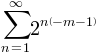

In [238]:
m = Symbol("m", integer=True, positive=True)
sum1 = Sum(2**(-(m+1)*n), (n, 1, oo)).doit()
sum1

なんかできなかったので、x=[さっきの式]と言う式を手動で作る。

\begin{eqnarray}
x &=&\frac{1}{2^{m+1}} + \frac{1}{2^{2m+2}} + \frac{1}{2^{3m+3}} + \frac{1}{2^{4m+4}} + \frac{1}{2^{5m+5}} + \frac{1}{2^{6m+6}} + \cdots \\
x &=&\frac{1}{2^{m+1}} + \frac{1}{2^{m+1}}x
\end{eqnarray}

解く。

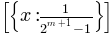

In [241]:
x =  Symbol("x")
sol3 = solve(Eq(x, 1/(2**(m+1)) + x/(2**(m+1))))
sol3

In [248]:
sum2 = sol3[0][x]
sum2.subs(m, 99) == sum1.subs(m, 99).doit() # テストケース(笑)

True

うん。テストケース(笑)も通ったようだし、これで大丈夫だね！

そしたら、さっきの式に$m=1$を代入したものから$m=\infty$を代入したものまでを足し合わせたものが、答えになる。

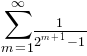

In [287]:
ans5_sum = Sum(sum2, (m, 1, oo)).doit()
ans5_sum

あれれ。。これもまた計算できないやつか。
とりあえず数値にして見よう。

In [301]:
ans5_sum.evalf()

だいたい60%と言ったところか。
うーん。小数点第3位以下を四捨五入しよう。

In [290]:
ans5 = ans5_sum.evalf().round(2)
ans5

## おまけ

表にしてみた。

In [402]:
import colorsys

w = 10
h = 10
data = []

for i in range(1, w+1):
    tmparr = []
    for j in range(1, h+1):
        tmparr.append(Rational(1, 2**i)*Rational(1, 2**j))
    data.append(tmparr)

def colorize(x):
    rgb = colorsys.hsv_to_rgb(0, 0, 1-x)
    return "background-color: rgb(%d, %d, %d)" % tuple(map(lambda x: floor(x*255), rgb))

import pandas
df = pandas.DataFrame(data)
df.index = list(range(1, w+1))
df.columns = list(range(1, h+1))
df.style.applymap(colorize)

SyntaxError: invalid syntax (<ipython-input-402-f40e32ddb21c>, line 23)